<AxesSubplot:xlabel='Date'>

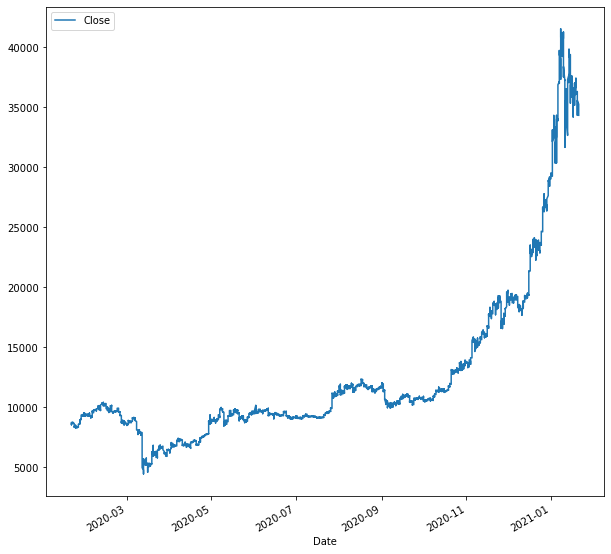

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
data=yf.download('BTC-USD',start='2020-01-21', interval='1h',  end='2021-01-21',progress=False)[['Close']]
data.head()
 
data.plot(figsize=(10,10))

In [2]:
from sklearn.preprocessing import MinMaxScaler
cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*0.80)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

7858 10
874 10
7858
874


In [3]:
#Build the model
import keras
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)
model.summary() 

Epoch 1/100
246/246 [==============================] - 4s 17ms/step - loss: 0.0019 - val_loss: 0.1391
Epoch 2/100
246/246 [==============================] - 4s 17ms/step - loss: 0.0011 - val_loss: 0.2799
Epoch 3/100
246/246 [==============================] - 4s 17ms/step - loss: 0.0016 - val_loss: 0.3037
Epoch 4/100
246/246 [==============================] - 4s 16ms/step - loss: 0.0023 - val_loss: 0.3446
Epoch 5/100
246/246 [==============================] - 4s 18ms/step - loss: 0.0026 - val_loss: 0.3459
Epoch 6/100
246/246 [==============================] - 5s 19ms/step - loss: 0.0025 - val_loss: 0.4322
Epoch 7/100
246/246 [==============================] - 4s 16ms/step - loss: 0.0015 - val_loss: 0.2960
Epoch 8/100
246/246 [==============================] - 4s 16ms/step - loss: 0.0011 - val_loss: 0.2220
Epoch 9/100
246/246 [==============================] - 4s 16ms/step - loss: 7.7736e-04 - val_loss: 0.1584
Epoch 10/100
246/246 [==============================] - 4s 17ms/step - loss: 5

Epoch 78/100
246/246 [==============================] - 4s 16ms/step - loss: 5.1094e-05 - val_loss: 0.0174
Epoch 79/100
246/246 [==============================] - 4s 16ms/step - loss: 5.0082e-05 - val_loss: 0.0177
Epoch 80/100
246/246 [==============================] - 4s 15ms/step - loss: 5.0261e-05 - val_loss: 0.0177
Epoch 81/100
246/246 [==============================] - 4s 16ms/step - loss: 4.9047e-05 - val_loss: 0.0180
Epoch 82/100
246/246 [==============================] - 4s 15ms/step - loss: 4.9480e-05 - val_loss: 0.0181
Epoch 83/100
246/246 [==============================] - 4s 15ms/step - loss: 4.9886e-05 - val_loss: 0.0181
Epoch 84/100
246/246 [==============================] - 4s 16ms/step - loss: 5.1225e-05 - val_loss: 0.0178
Epoch 85/100
246/246 [==============================] - 4s 15ms/step - loss: 5.0943e-05 - val_loss: 0.0173
Epoch 86/100
246/246 [==============================] - 4s 15ms/step - loss: 4.9464e-05 - val_loss: 0.0170
Epoch 87/100
246/246 [===============

Text(0.5, 1.0, 'Train Dataset')

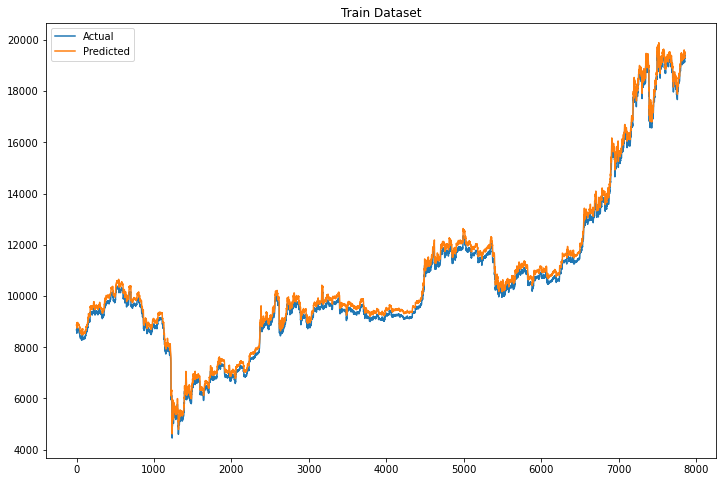

In [4]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Train Dataset")

Text(0.5, 1.0, 'Test Dataset')

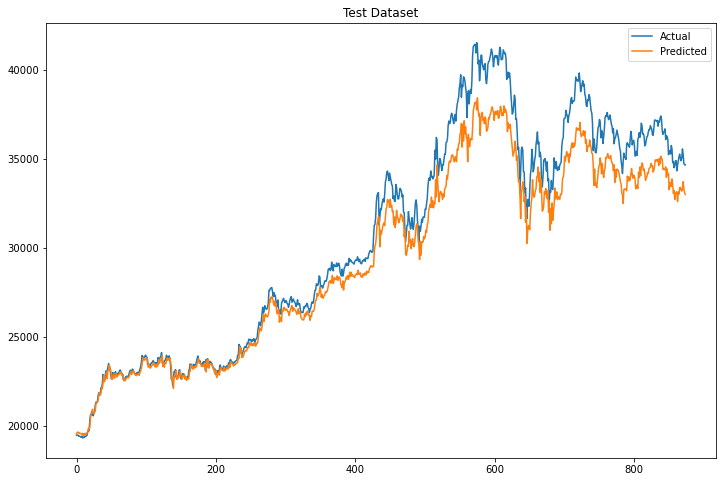

In [5]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")